# Sandbox to understand the Chandra data of Abell 2744



In [ ]:
# Import modules
import numpy, os, glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from astropy.io import fits
from astropy import wcs
from matplotlib.colors import LogNorm, SymLogNorm, Normalize
from astropy.coordinates import SkyCoord

from master_functions_abell2744 import load_gc_catalogue
from master_class_galaxy_cluster import GalaxyCluster
from master_class_lambdamaps import LensingMap, XrayMap

mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.size"] = 18.0
mpl.rcParams["legend.fontsize"] = 16.0
# mpl.rcParams['savefig.dpi'] = 100

ImportError: cannot import name 'spawn_magnitudes_generic' from partially initialized module 'master_functions_continuous' (most likely due to a circular import) (/Users/mreina/Documents/Science/000-Projects/2020-McMaster/git-starclusters-in-jwst/code_poisson_comparison/abell2744/master_functions_continuous.py)

## Define general variables

In [2]:
# 1: create the instance of the Galaxy Cluster class for Abell 2744
# luminosity distance to Abell2744
distance_to_a2744 = 1630 * u.Mpc
# from Harris & Reina-Campos 2023
arcsec_kpc = (
    2100 * u.kpc / (460 * u.arcsec)
)  # conversion between arcsec and kpc at the distance of Abell 2744
# create the instance of the Galaxy Cluster class for Abell 2744
abell2744 = GalaxyCluster(
    "Abell2744", distance=distance_to_a2744, redshift=0.308, arcsec_to_kpc=arcsec_kpc
)

# create the output path
# out_path = os.path.join("..", "A2744_UNCOVER_Mosaics_Reduced")
# if not os.path.exists(out_path):
#    os.makedirs(out_path)

## Figure: on-target and full-field images for several observations

In [ ]:
fnames = glob.glob(os.path.join("..", "A2744_Chandra_*", "primary", "*img2.fits"))
fnames.sort()

fig, axs = plt.subplots(1, 2, figsize=(10, 5.5))

for i, fname in enumerate(fnames):
    print(fname)
    with fits.open(fname, output_verify="fix") as fits_table:
        stlight_header = fits_table[0].header
        stlight_img = fits_table[
            0
        ].data  # transpose the image, it is read as (rows, columns) otherwise

    axs[i % 2].hist(
        stlight_img.flatten(),
        bins=numpy.linspace(0, numpy.percentile(stlight_img.flatten(), 99)),
        histtype="step",
        label=fname.split("/")[1].split("_ID")[-1],
    )
    axs[i % 2].set_yscale("log")
plt.show()

../A2744_Chandra_ID2212/primary/acisf02212N005_cntr_img2.fits
0.0 1.0


Set MJD-END to 52155.486181 from DATE-END'. [astropy.wcs.wcs]


../A2744_Chandra_ID2212/primary/acisf02212N005_full_img2.fits
0.0 6.0
../A2744_Chandra_ID7712/primary/acisf07712N004_cntr_img2.fits
0.0 0.0


Set MJD-END to 54354.079977 from DATE-END'. [astropy.wcs.wcs]


../A2744_Chandra_ID7712/primary/acisf07712N004_full_img2.fits
0.0 2.0
../A2744_Chandra_ID7915/primary/acisf07915N003_cntr_img2.fits
0.0 1.0


Set MJD-END to 54047.789525 from DATE-END'. [astropy.wcs.wcs]


../A2744_Chandra_ID7915/primary/acisf07915N003_full_img2.fits
0.0 3.0
../A2744_Chandra_ID8477/primary/acisf08477N003_cntr_img2.fits
0.0 1.0


Set MJD-END to 54262.041956 from DATE-END'. [astropy.wcs.wcs]


../A2744_Chandra_ID8477/primary/acisf08477N003_full_img2.fits
0.0 6.0
../A2744_Chandra_ID8557/primary/acisf08557N003_cntr_img2.fits
0.0 1.0


Set MJD-END to 54265.749572 from DATE-END'. [astropy.wcs.wcs]


../A2744_Chandra_ID8557/primary/acisf08557N003_full_img2.fits
0.0 4.0


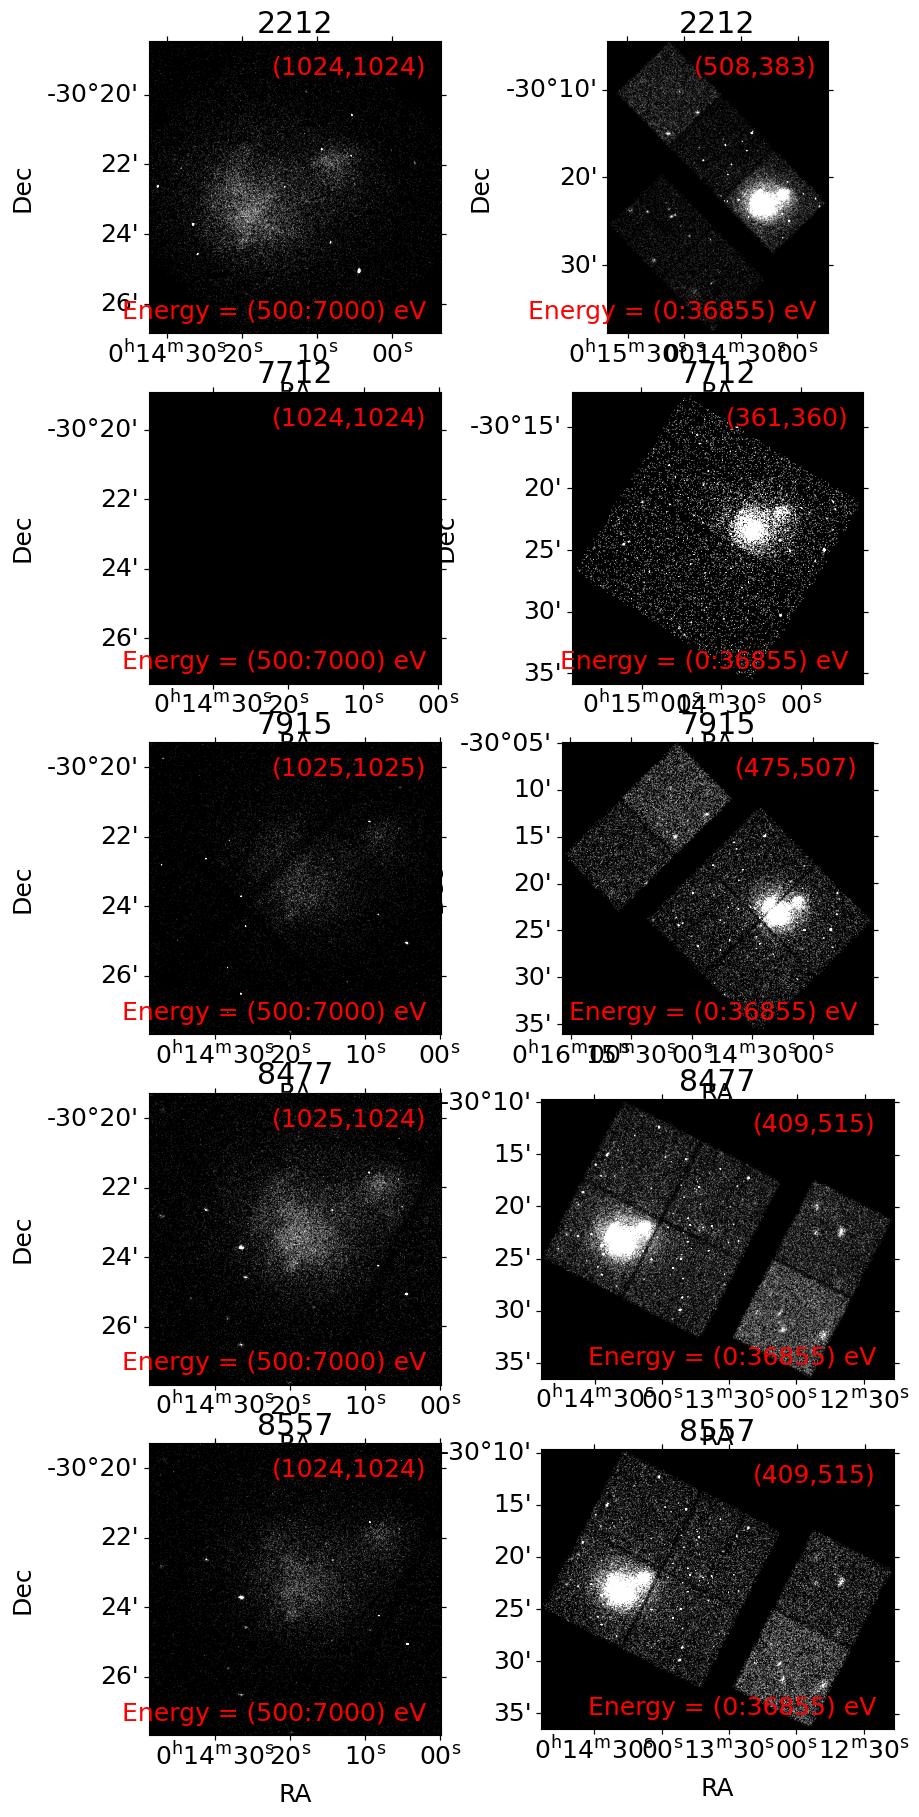

In [26]:
fnames = glob.glob(os.path.join("..", "A2744_Chandra_*", "primary", "*img2.fits"))
fnames.sort()

fig = plt.figure(figsize=(10, 22))


for i, fname in enumerate(fnames):
    print(fname)
    with fits.open(fname, output_verify="fix") as fits_table:
        stlight_header = fits_table[0].header
        stlight_img = fits_table[
            0
        ].data  # transpose the image, it is read as (rows, columns) otherwise

    if stlight_img is not None:
        print(numpy.percentile(stlight_img, 1), numpy.percentile(stlight_img, 99))
        ax = fig.add_subplot(5, 2, i + 1, projection=wcs.WCS(stlight_header))
        ax.imshow(
            stlight_img,
            cmap="Greys_r",
            norm=Normalize(
                vmin=numpy.percentile(stlight_img, 1),
                vmax=numpy.percentile(stlight_img, 99),
            ),
            origin="lower",
        )
        ax.set_xlabel("RA")
        ax.set_ylabel("Dec")
        ax.set_title(fname.split("/")[1].split("_ID")[-1])
        ax.annotate(
            "({:d},{:d})".format(*stlight_img.shape),
            xy=(0.95, 0.95),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color="red",
        )
        ax.annotate(
            "Energy = ({:s}) eV".format(stlight_header["DSVAL13"]),
            xy=(0.95, 0.05),
            ha="right",
            xycoords="axes fraction",
            color="red",
        )

plt.show()

In [3]:
map_xray = XrayMap("X-ray", "xray map")

Set MJD-END to 54262.041956 from DATE-END'. [astropy.wcs.wcs]


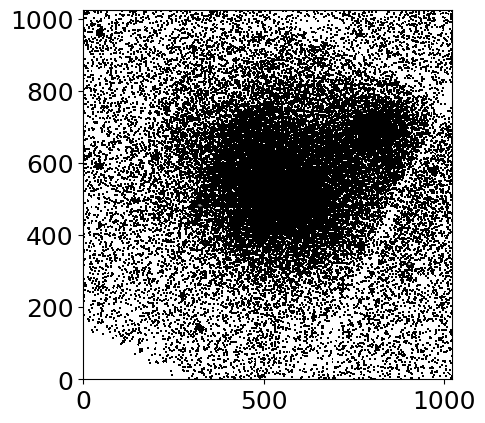

In [8]:
plt.imshow(map_xray.img.T, cmap="Greys_r", norm=LogNorm(), origin="lower")